Trie can store information about keys/numbers/strings compactly in a tree.

Tries consists of nodes, where each node stores a character/bit. We can insert new strings/numbers accordingly.

Here is an example trie of strings:

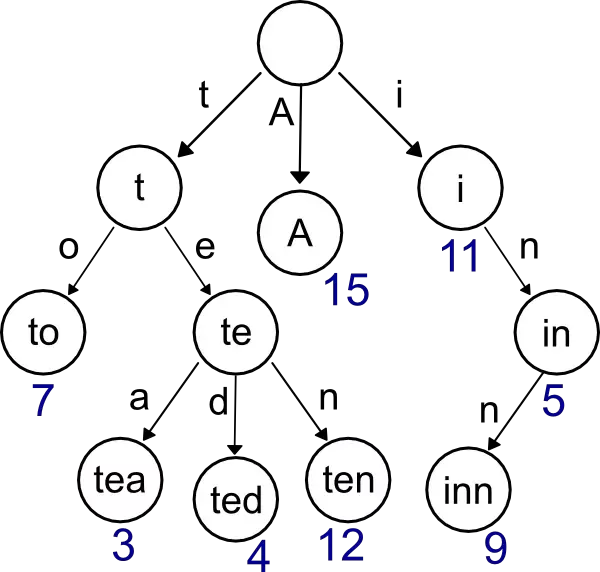



Problem1: Given an array of integers, we have to find two elements whose XOR is maximum.

Suppose we have a data structure which can satisfy two types of queries:
1. Insert a number X
2. Given a Y, find maximum XOR of Y with all numbers that have been inserted till now.

If we have this data structure, we'll insert integers as we go, and with query of 2nd type we'll find the maximum XOR.
Trie is the data structure we'll use.

Insertion

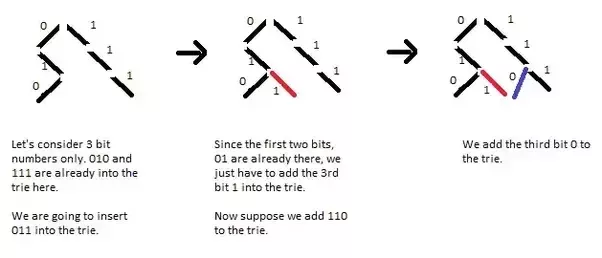

So, we trace the path of the number we have to insert, we don't have to draw the existing path again.

Insertion of an N length key takes O(N) which is log2(MAX) where MAX is the maximum number to be inserted in trie, because there are at maximum log2(MAX) binary bits in a number.

Now, for query of type 2:

Let's say our number Y is b1,b2...bn, where b1,b2.. are binary bits. We start from b1. Now for the XOR to be maximum, we'll try to make most significant bit 1 after taking XOR. So, if b1 is 0, we'll need a 1 and vice versa. In the trie, we go to the required bit side. If favorable option is not there, we'll go other side. Doing this all over for i=1 to n, we'll get the maximum XOR possible.

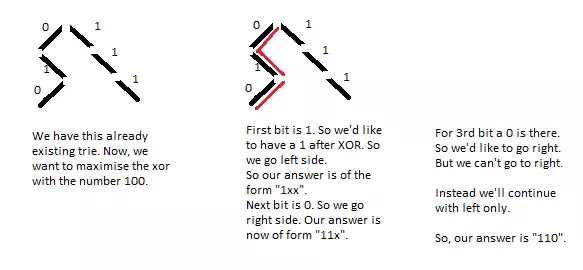

Query too is log2(MAX).

In [1]:
def insert(root, num, level):
    if level == -1: 
        return root
    x = num[level]
    if x == 1: 
        if not root.right: 
            root
        insert(root.right, num, level + 1)
    else: 
        if not root.left:
            
        insert(root.left, num, level + 1)


def subXOR(lst):
    ans = 0
    q = 0
    for i in range(len(lst)):
        p = q ^ lst[i]
        ans += p 
        insert(Trie, str(bin(q)), 0)
        q = p
    return ans
        

IndentationError: expected an indented block (<ipython-input-1-bd1a0e86767d>, line 12)

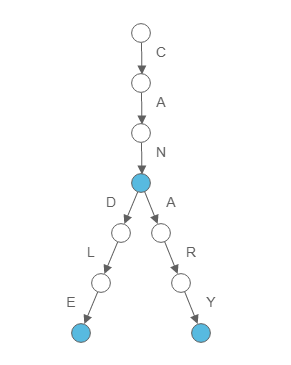

Java trie implementation (trie for strings)

    class TrieNode {
        Map<Character, TrieNode> edges;
        boolean isWordEnd;

        TrieNode() {
            this.edges = new HashMap<>();
            this.isWordEnd = false;
        }
    }

    TrieNode root = new TrieNode();
    
    #We start from the root, iterate over the characters of the new word, and move along the nodes and edges, creating them when needed. 
    public void insert(TrieNode root, String word) {
        TrieNode currentNode = root;
        for (char c : word.toCharArray()) {
            if (!currentNode.edges.containsKey(c)) {
                currentNode.edges.put(c, new TrieNode());
            }
            currentNode = currentNode.edges.get(c);
        }
        currentNode.isWordEnd = true;
    }


    #we start from the root, iterate over the characters of the new word, and move along nodes and edges of the trie. If we try to move along the edge that doesn't exist, we simply return false. In the end, we also need to check if a word ends in the node we are currently in.
    
    public boolean search(TrieNode root, String word) {
        TrieNode currentNode = root;
        for (char c : word.toCharArray()) {
            if (!currentNode.edges.containsKey(c)) {
                return false;
            }
            currentNode = currentNode.edges.get(c);
        }
        return currentNode.isWordEnd;
    }    
    

In [3]:
#Python implementation

class Trie:
    class TrieNode:
        def __init__(self):
            self.edges = {}
            self.isEndWord = False
        
    
    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.root = self.TrieNode()

    def insert(self, word: str) -> None:
        """
        Inserts a word into the trie.
        """
        curr_node = self.root
        for c in word: 
            if not c in curr_node.edges: 
                curr_node.edges[c] = self.TrieNode()
            curr_node = curr_node.edges.get(c)
        curr_node.isEndWord = True
        

    def search(self, word: str) -> bool:
        """
        Returns if the word is in the trie.
        """
        curr_node = self.root
        for c in word: 
            if not c in curr_node.edges: 
                return False
            curr_node = curr_node.edges.get(c)
        return curr_node.isEndWord

    Given an integer array nums, return the maximum result of nums[i] XOR nums[j], where 0 ≤ i ≤ j < n.

In [1]:
class TrieNode: 
    def __init__(self):
        self.edges = {}


def insert(root, num):
    curr_root = root
    for i in reversed(range(31)):
        edge = (num >> i) & 1
        if not edge in curr_root.edges: 
            curr_root.edges[edge] = TrieNode()
        curr_root = curr_root.edges.get(edge)


def maximum(root, num):
    curr_root = root
    res = []
    for i in reversed(range(31)):
        if not curr_root: break
        edge = (num >> i) & 1
        if edge ^ 1 in curr_root.edges:
            res.append(1)
            curr_root = curr_root.edges.get(edge^1)
        else: 
            res.append(0)
            curr_root = curr_root.edges.get(edge)
    return int("".join(map(str, res)), 2)

nums = [14,70,53,83,49,91,36,80,92,51,66,70]
Trie = TrieNode()
res = 0
for num in nums: 
    insert(Trie, num)
    res = max(res, maximum(Trie, num))
print(res)



#Bit operation'larla çözümü
def findMaximumXOR(nums):
    ans = 0
    mask = 0
    for i in reversed(range(31)):
        mask |= (1 << i)
        #her sayının 32'lik bit sisteminde baştan i değerine kadar olan kısmını çıkarıyoruz.
        #mask değeri baştan i değerine kadar 1'lerle dolu olan bir sayıdır. Bu mask değeri ile AND işlemi yapıldığında i değerine
        #kadarki tüm sayılar 0'a dönüşür. 
        possibles = set([num & mask for num in nums])

        #cevap olarak döndüreceğimiz sayının 32'lik bit sisteminde baştan i değerinde 1(sayıyı en büyük yapan değer) olup olamayacağına 
        #bakıyoruz ve olabilirse cevabı bu değere eşitliyoruz.
        #eğer 1 olamazsa 0 olarak kalıyor ve devam ediyoruz. 
        ansWithOne = ans | 1<<i
        for pref in possibles:
            if ansWithOne^pref in possibles:
                ans = ansWithOne
                break
    #bit sisteminde sol taraftan başladığımız için her seferinde en büyük basamağı 1 yapmaya çalışıp 1 olamayacakları aslında 
    #eliyoruz. Bu sayede en büyük sayıyı buluyoruz.
    return ans
print(findMaximumXOR(nums))

127
127
